# Decision Tree

In [29]:
import numpy as np

In [26]:
import mglearn
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline

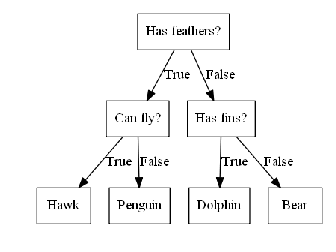

In [35]:
mglearn.plots.plot_animal_tree()

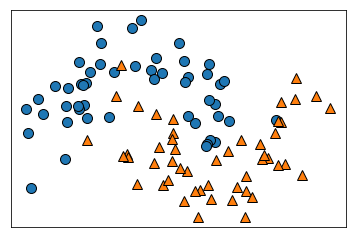

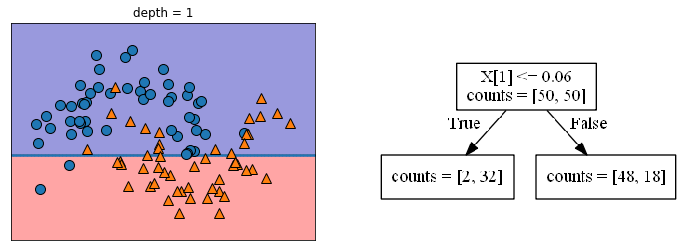

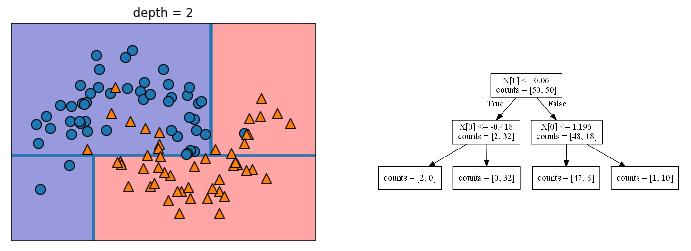

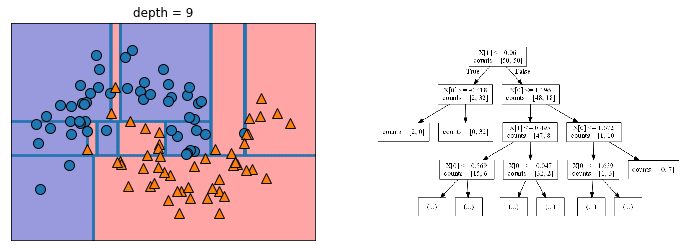

In [5]:
mglearn.plots.plot_tree_progressive()

The recursive partitioning of data is repeated until each region in the partition only contains a single target value.
THe leaf of the tree that contains data points that all share the same target value is called pure.


### How prediction is made?

A prediction on a new data point is made by checking which region of the feature space the point lies in, and then predicting the majority target in that region.
The region can be found by traversing the tree from the root and going left or right , depending on wether the test is fullfilled or not.

### Complexity of decision tree

Building a tree as given above and continuing untill all leaves are pure leads to a model that is highly overfit and complex.

### Controlling complexity of decision trees.

There are two methods to control the complexity of decision tree



Pre Pruning and post pruning

Pre Pruning : includes limiting the maximum depth of the tree,limiting the maximum number of leaves,or requiring a minimum number of points in a node to keep splitting it.

## DecisionTreeClassifier on Breast cancer dataset

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [5]:
cancer=load_breast_cancer()
# Train Test split
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [7]:
tree=DecisionTreeClassifier()

In [8]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
print(" Accuracy on Train Dataset {}" .format(tree.score(X_train,y_train))) # 100% accuracy

 Accuracy on Train Dataset 1.0


In [13]:
print(" Accuracy on Test Dataset {}" .format(tree.score(X_test,y_test))) #92% accuracy

 Accuracy on Test Dataset 0.9230769230769231


As accuracy on the training set is 100% - because the leaves are pure ,the tree was grown deep enough that it could perfectly memorize all the labels on the training data.

Test set accuracy is slightly worse . than linear models . If we don't restrict the depth of the tree it can grow more complex and deep. Unpruned tree are therefore more prone to overfitting and not generalizing well to new data points.

### Pre Pruning on Breast Cancer Dataset

In [17]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
tree.score(X_train,y_train)

0.98826291079812212

Here we have restricted the tree depth to 4 . after reaching 4 it stops building.This leads to lower the accuarcy on train set but improvement on test set and decreasing overfitting.

In [19]:
tree.score(X_test,y_test) # increase in accuracy for  the test set data

0.95104895104895104

## ANALYZING DECISION TREES

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['Maligant','Benign'],feature_names=cancer.feature_names,impurity=False,filled=True)

In [2]:
import graphviz

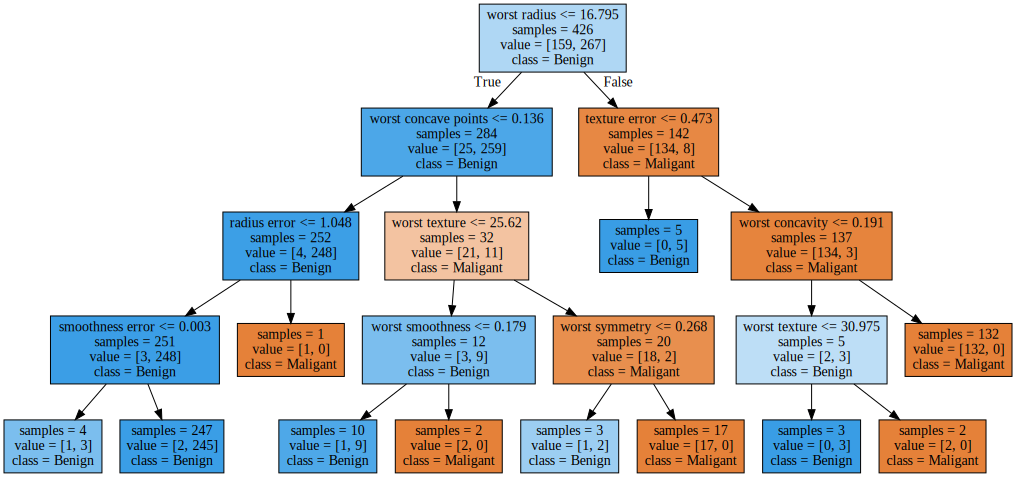

In [3]:
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

### Feature Importance in Trees

feature importance rates how important each feature is to make decision for the decision tree.
it is a number between 0 & 1.

0-'not used at all

1-'perfectly predict the target'

In [23]:
print(" Feature importances : \n {}" .format(tree.feature_importances_))

 Feature importances : 
 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


### Visualizing Feature importances

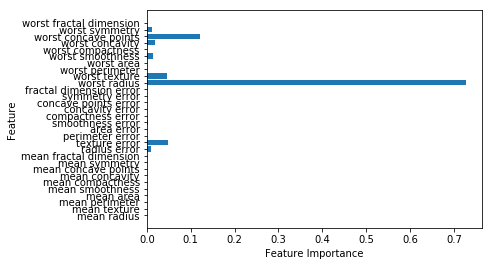

In [36]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

here we can see that the feature used for the top split is by far the most important feature.

### Feature importance is not an indicative of the class label

The feature importance tells us how important a feature is, but not wether high value of the feature importance of this feature indicates a class and low value to another class,this is not the case here.

In fact,there might not be such a simple relationship between features and class,as you can see in the following plot :

Feature importances: [ 0.  1.]


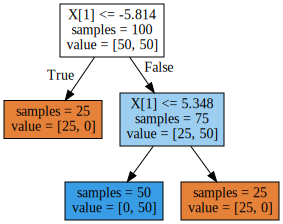

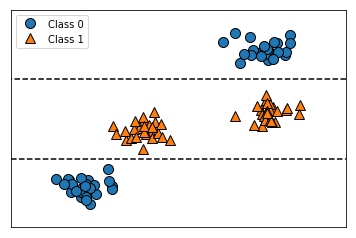

In [37]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

A two dimensional dataset in which the feature on the y-axis has a nonmonotonous relationship with the class label and the decision boundaries found by a decision tree.

The plot shows a dataset with two features adn two classes.

Here all info is contained in X[1] , and X[0] is not used for classification at all

But the relation ship betwenn X[1] and the output is non monotonous as we cannot say high X[0] means class 0 anf low means class 1 (or Vice Versa)

# Decision Tree for Regresssion

In [38]:
import pandas as pd

In [41]:
ram_prices=pd.read_csv("data/ram_price.csv") # IMPORTING CSV FILES

The usage and analysis of regression trees is very similar to that of classification tree.

The DecisionTreeRegressor is not able to extrapolate , or make predictions outside of the range of training data.

#### RAM prices with time. Y-axis -> RAM prices per Mb , X-axis -> Years

##### We will plot a semi log graph

Text(0,0.5,'Price in $/Mbyte')

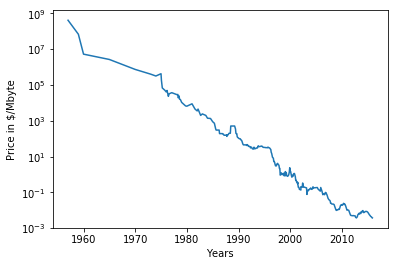

In [44]:
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Years")
plt.ylabel("Price in $/Mbyte")

Explanation : When plotting logarithmically , the relation seems to be quite linear and so should be relatively easy to predict , apart from some bumps.

#### Using DecisionTreeregressor and LinearRegression to make forecast after 2000 in RAM price as given above:

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
from sklearn.linear_model import LinearRegression

we will make a forecast for the years after 2000 using the historical data up to that point , with date as our only feature as we are doing regression.

In [65]:
data_train=ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [66]:
X_train=data_train.date[:,np.newaxis] # predict price based on date
y_train=np.log(data_train.price) # we use log transform

In [67]:
tree=DecisionTreeRegressor().fit(X_train,y_train)

In [68]:
linear_reg=LinearRegression().fit(X_train,y_train)

In [69]:
X_all=ram_prices.date[:,np.newaxis]

In [70]:
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

After Training the model and making predictions,we apply exponential map to undo the logarithm transform.

We will make predictions on the whole datasets for visulalization purpose here,but for a quantitaive evaluation we would only consider the test dataset:

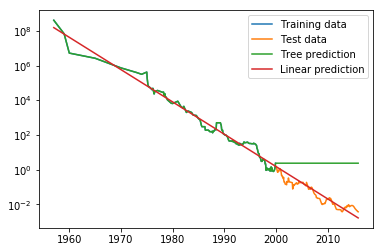

In [71]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

Explanation:

Linear model predicts the with a line as we know that done in linear Regression.
The line provides a quite a good forecast for the test data (the years after 2000) , while glosing over some of the finer variations in both the training and test data.

The tree model , on the other hand , makes perfect predictions on the training data , as we have not restricted it complexity.


#### CONCLUSION:

Once we leave the data range that is after year 2000 , the linear model model does it prediction as it used to do using linear regression , but in case of the tree model,the model simply keeps predicting the last known point.
The TREE model has no ability to generate new responses , outside of what was seen in the training data.